In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')

# Формируем набор признаков и целевую переменную
X = data[data.columns[:-1]]
Y = data['affair']

# Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Обучаем модель
model = LogisticRegression().fit(X_train, Y_train)

# Получаем прогнозные значения модели
predictions = model.predict_proba(X_test)

### Посчитать tpr и fpr в ноутбуке к лекции.

In [3]:
tpr = [] # True positive rate
fpr = [] # False negative rate
pr = []  # Precision
re = []  # Recall

for thres in range(101):
    tp = 0  # True positive
    fp = 0  # False positive
    fn = 0  # False negative
    tn = 0  # True negative

    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
        if predicted_prob >= thres / 100:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    # Save TPR, FPR, precision and recall for each threshold
    tpr.append(tp / (tp + fn))  
    fpr.append(fp / (fp + tn)) 
    
    if tp == 0:
        pr.append(0)
        re.append(0)
    else:
        pr.append(tp / (tp + fp))
        re.append(tp / (tp + fn))

print('TPR for threshold = 0.5:', tpr[50])
print('FPR for threshold = 0.5:', fpr[50])

TPR for threshold = 0.5: 0.3723228995057661
FPR for threshold = 0.5: 0.10053722179585571


### Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

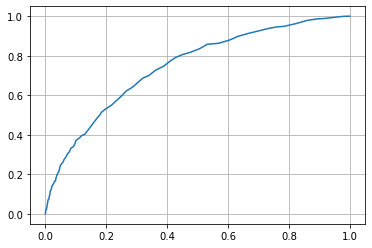

In [4]:
plt.plot( fpr, tpr )
plt.grid()

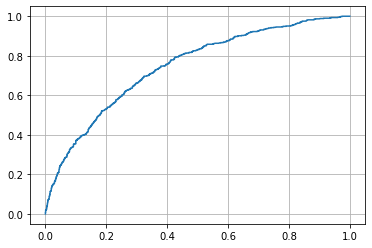

In [5]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

plt.plot( fpr, tpr )
plt.grid()

### Построить график Precision - Recall на этих же данных.

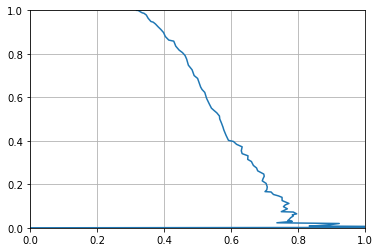

In [6]:
plt.plot( pr, re )
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

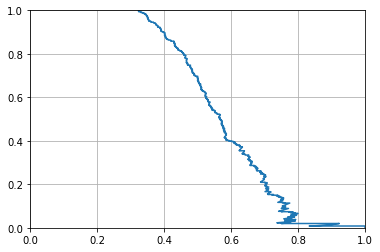

In [7]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

plt.plot( pr, re )
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()